# ANALITICA DE DATOS CON INTELIGENCIA ARTIFICIAL

# Conceptos de estadistica y analitica

**Universidad de los Andes**

2025

---


Juan Carlos Vega, M.Sc.

# 📌 Introducción a la selección y extracción de características

En problemas de **aprendizaje automático y modelado predictivo**, no todas las variables disponibles aportan información útil.  
Algunas pueden ser **irrelevantes, redundantes o incluso introducir ruido**, lo cual afecta la capacidad del modelo para generalizar.  

Por eso existen dos enfoques fundamentales:

- **Selección de características (Feature Selection):** consiste en **elegir un subconjunto** de las variables originales que mejoran el rendimiento del modelo sin perder información esencial.  
  Ejemplos: RFE (Recursive Feature Elimination), búsqueda exhaustiva, regularización con Lasso.

- **Extracción de características (Feature Extraction):** consiste en **transformar las variables originales** en nuevas representaciones más compactas y útiles, preservando la información más relevante.  
  Ejemplos: PCA (Análisis de Componentes Principales), Autoencoders.

Estos métodos ayudan a:
- Reducir la **dimensionalidad** y el **costo computacional**.  
- Evitar el **overfitting**.  
- Mejorar la **interpretabilidad** del modelo.  
- Destacar la información más relevante de los datos.

En este capítulo veremos técnicas clave como **RFE, búsqueda exhaustiva, regresión Lasso y Ridge**, analizando cómo funcionan, sus ventajas, limitaciones y cuándo conviene aplicarlas.


## 🔎 Comparación PCA vs LCA

| Característica            | **PCA (Principal Component Analysis)**                                      | **LCA (Latent Class Analysis)**                                       |
|----------------------------|----------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Tipo de técnica**        | Reducción de dimensionalidad (análisis factorial, método lineal).          | Modelado probabilístico (clasificación no supervisada).                |
| **Objetivo principal**     | Encontrar combinaciones lineales de variables (componentes principales) que expliquen la mayor varianza. | Identificar **clases/categorías ocultas** (no observables) en la población. |
| **Datos de entrada**       | Variables numéricas continuas, preferiblemente correlacionadas.            | Variables categóricas (aunque también se puede usar en datos mixtos).  |
| **Salida**                 | Nuevas variables continuas (componentes), ordenadas por importancia (varianza explicada). | Probabilidades de pertenencia de cada individuo a clases latentes.     |
| **Supuesto clave**         | Las relaciones importantes se capturan en la **varianza lineal** de los datos. | Los individuos pertenecen a un número finito de **clases ocultas** mutuamente excluyentes. |
| **Interpretación**         | Difícil: cada componente es combinación de muchas variables.               | Más interpretativo: cada clase suele corresponder a un perfil o segmento de población. |
| **Aplicaciones típicas**   | - Reducción de dimensionalidad antes de ML.<br>- Compresión de imágenes.<br>- Análisis de señales o genómica.<br>- Eliminar colinealidad. | - Psicología y ciencias sociales.<br>- Segmentación de clientes.<br>- Educación (perfiles de estudiantes).<br>- Epidemiología (subpoblaciones). |
| **Cuándo usarlo**          | Cuando tienes **muchas variables continuas** y quieres resumirlas en menos dimensiones sin perder demasiada información. | Cuando sospechas que existen **subgrupos ocultos** en tu muestra y quieres descubrirlos. |


**En resumen:**

**PCA →** te da nuevas variables continuas (componentes) que resumen la información.

**LCA →** te da clases ocultas (clusters probabilísticos) a las que cada individuo pertenece con cierta probabilidad.

👉 Si quieres reducir dimensionalidad de features, usa PCA.
👉 Si quieres segmentar la población en perfiles ocultos, usa LCA.

## 🔎 Comparación de tipos de correlación

| Tipo de correlación       | Qué mide                                                                 | Datos apropiados                                   | Rango/Salida         | Supuestos principales                                        | Cuándo usarla |
|---------------------------|--------------------------------------------------------------------------|---------------------------------------------------|----------------------|--------------------------------------------------------------|---------------|
| **Pearson (r)**           | Fuerza y dirección de la **relación lineal** entre dos variables.        | Continuas, distribuidas aproximadamente normal.   | -1 a +1              | Linealidad, homocedasticidad, normalidad aproximada.         | Cuando esperas relación lineal en datos continuos. |
| **Spearman (ρ)**          | Relación **monótona** (creciente o decreciente), basada en rangos.       | Continuas u ordinales (no requiere normalidad).   | -1 a +1              | Relación monótona (no necesariamente lineal).                | Cuando hay outliers o relación no lineal pero monótona. |
| **Kendall (τ)**           | Concordancia de rangos entre dos variables.                             | Ordinales o continuas con pocos datos.            | -1 a +1              | Similar a Spearman pero más robusta en muestras pequeñas.    | Cuando la muestra es pequeña o hay muchos empates en rangos. |
| **Phi (φ)**               | Asociación entre **dos variables dicotómicas** (binarias).              | Categóricas binarias.                             | -1 a +1              | Tablas 2x2.                                                  | En análisis de variables binarias (ej. sí/no). |
| **Cramer’s V**            | Asociación entre variables **categóricas nominales** (más de 2 clases). | Categóricas nominales.                            | 0 a 1                | Basado en chi-cuadrado.                                      | Para tablas de contingencia grandes (>2x2). |
| **Point-Biserial (r_pb)** | Correlación entre una variable continua y una binaria.                  | Continua + binaria.                               | -1 a +1              | Variable binaria codificada (0/1).                          | En psicometría y pruebas dicotómicas vs puntuaciones. |

---

### ✅ Resumen rápido:
- **Pearson**: datos continuos, relación lineal.  
- **Spearman / Kendall**: datos ordinales o no normales, relación monótona.  
- **Phi / Cramer’s V**: datos categóricos.  
- **Point-Biserial**: una continua + una binaria.


## 🔎 Correlación vs. Correlación Cruzada

| Concepto                  | Definición                                                                 | Uso principal                                                   | Ejemplo típico |
|---------------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------|----------------|
| **Correlación (clásica)** | Mide el grado de relación (lineal, monótona, ordinal) entre **dos variables** en un mismo instante o conjunto de observaciones. | Estadística descriptiva, psicometría, ciencias sociales.        | Relación entre horas de estudio y calificación en un examen. |
| **Correlación cruzada**   | Extiende la correlación considerando **desplazamientos temporales (lags)** entre dos series. Evalúa cómo se relaciona una serie con otra en diferentes retardos. | Series temporales, señales, econometría, climatología.          | Ver si la temperatura de hoy predice la demanda eléctrica de mañana. |

---

### 🔹 Detalles clave de la **correlación cruzada**
- Se calcula como:
  \[
  C_{xy}(k) = \sum_t x(t) \cdot y(t+k)
  \]
  donde `k` es el **desplazamiento temporal (lag)**.
- Si el valor máximo ocurre en `k=+3`, significa que la serie `x` **se adelanta 3 pasos** respecto a `y`.
- Es muy usada para:
  - Identificar relaciones de causa/efecto temporal.
  - Alinear señales (ej. en sismología o procesamiento de audio).
  - Predecir variables con rezago (ej. series económicas).

---

### ✅ Resumen rápido
- **Correlación simple**: mide la relación instantánea entre dos variables.  
- **Correlación cruzada**: mide la relación cuando una variable puede estar **desfasada en el tiempo** respecto a la otra.  

👉 Usa correlación simple si tus datos no tienen orden temporal.  
👉 Usa correlación cruzada si trabajas con **series temporales** o señales y sospechas que la dependencia aparece con retraso.


## 🔎 Autocorrelación

| Concepto              | Definición                                                                 | Uso principal                                              | Ejemplo típico |
|-----------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------|----------------|
| **Autocorrelación**   | Es la correlación de una serie consigo misma en diferentes desplazamientos temporales (lags). | Detectar patrones repetitivos o dependencias temporales.  | Ver si la demanda eléctrica de hoy se parece a la de hace 24 horas. |

---

### 🔹 Detalles clave
- Matemáticamente es un caso especial de la **correlación cruzada** donde `x = y`.  
- Se calcula como:
  \[
  R_{xx}(k) = \sum_t x(t) \cdot x(t+k)
  \]
- Útil para:
  - Identificar **estacionalidad** o periodicidad en series (ej. patrones diarios, semanales, anuales).
  - Ver cuánto dura la “memoria” de una serie (ej. procesos AR en estadística).
  - Diagnóstico en modelos de series temporales (ej. usar ACF y PACF en ARIMA).

---

### 🔹 Relación con otros conceptos
- **Correlación simple**: compara dos variables al mismo tiempo.  
- **Correlación cruzada**: compara dos series en diferentes retardos.  
- **Autocorrelación**: compara **una sola serie consigo misma** en distintos retardos.

---

### ✅ Resumen rápido
- Si quieres saber cómo dos variables se relacionan → usa **correlación**.  
- Si quieres saber si una variable “influye con retraso” en otra → usa **correlación cruzada**.  
- Si quieres saber si una variable depende de su propio pasado → usa **autocorrelación**.


## 🔎 Correlación parcial

### 📌 Definición
La **correlación parcial** mide la relación entre dos variables **controlando el efecto de una o más variables adicionales**.  
Es decir, evalúa cuánto se relacionan dos variables de forma **directa**, eliminando la influencia de terceras variables que puedan estar introduciendo dependencia.

---

### 📌 Diferencia con la correlación simple
- **Correlación simple**: mide la asociación total entre X e Y (incluyendo efectos de otras variables).
- **Correlación parcial**: mide solo la asociación **residual**, después de eliminar el efecto de otras variables Z.

Ejemplo:  
Si medimos **ejercicio (X)** y **peso corporal (Y)**, puede que estén correlacionados.  
Pero al controlar por **ingesta calórica (Z)**, la correlación parcial entre ejercicio y peso podría ser menor, mostrando que la dieta explica gran parte de la relación.

---

### 📌 En series temporales
En análisis de series, la **función de autocorrelación parcial (PACF)** es fundamental:
- **ACF (Autocorrelación)**: muestra la correlación de una serie consigo misma en diferentes retardos, pero incluye efectos indirectos.
- **PACF (Autocorrelación parcial)**: muestra la correlación **directa** entre la serie y su retardo, eliminando la influencia de retardos intermedios.

👉 Por eso, en modelos **AR(p)** se usa la PACF para identificar el orden `p`.

---

### 📌 Interpretación en PACF
- Si el PACF muestra un corte abrupto después del lag `p` → sugiere un modelo **AR(p)**.  
- Si el PACF decae gradualmente → el proceso puede ser más complejo (ej. mixto ARMA).  

---

### ✅ En resumen
- **Correlación parcial**: mide la relación directa entre dos variables controlando otras.  
- **PACF en series**: herramienta clave para seleccionar el número de retardos en modelos AR/ARIMA.  
- Complementa a la **ACF**, que muestra las correlaciones totales (directas + indirectas).


In [1]:
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd

# Semilla para reproducibilidad
rng = np.random.default_rng(42)

# Serie AR(2): y_t = 0.6 y_{t-1} - 0.3 y_{t-2} + ruido
n = 500
y = np.zeros(n)
noise = rng.normal(0, 1, size=n)
for t in range(2, n):
    y[t] = 0.6*y[t-1] - 0.3*y[t-2] + noise[t]

# Si ya tienes tu serie como pandas.Series, usa:
# y = tu_serie.values.astype(float)


## calculo numerico de ACF  y PACF


In [3]:
from statsmodels.tsa.stattools import acf, pacf

# nlags: cuántos retardos inspeccionar
nlags = 40

acf_vals = acf(y, nlags=nlags, fft=True)         # incluye lag 0
pacf_vals = pacf(y, nlags=nlags, method='yw')    # Yule-Walker para PACF

print("ACF (primeros 10 lags):", np.round(acf_vals[:10], 3))
print("PACF (primeros 10 lags):", np.round(pacf_vals[:10], 3))


ACF (primeros 10 lags): [ 1.     0.515 -0.002 -0.198 -0.165 -0.072 -0.027  0.022 -0.006 -0.052]
PACF (primeros 10 lags): [ 1.     0.516 -0.365 -0.015 -0.031 -0.021 -0.043  0.049 -0.09  -0.021]


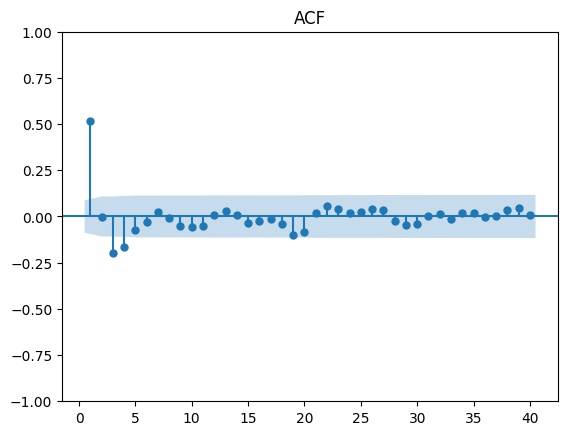

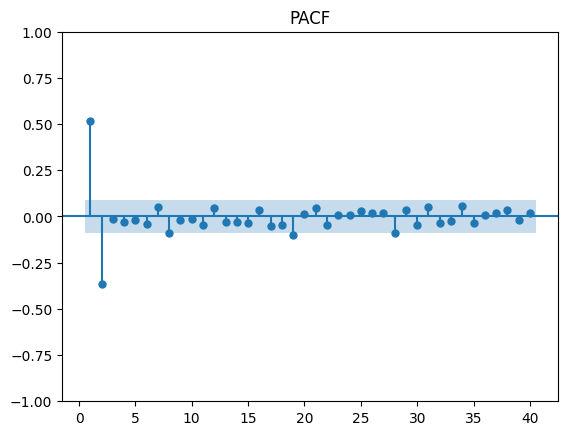

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF AUTOCORRELACION
fig1 = plot_acf(y, lags=nlags, zero=False)
plt.title("ACF")
plt.show()

# PACF AUTOCORRELACION PARCIAL
fig2 = plot_pacf(y, lags=nlags, zero=False, method='yw')
plt.title("PACF")
plt.show()


In [5]:
# ejemplo de correlación cruzada
import numpy as np

def xcorr_lag(x, y, max_lag=48):  # ajusta a tu frecuencia
    lags = np.arange(-max_lag, max_lag+1)
    corrs = []
    x = (x - x.mean())/x.std()
    y = (y - y.mean())/y.std()
    for k in lags:
        if k < 0:
            corrs.append(np.corrcoef(x[-k:], y[:len(y)+k])[0,1])
        elif k > 0:
            corrs.append(np.corrcoef(x[:len(x)-k], y[k:])[0,1])
        else:
            corrs.append(np.corrcoef(x, y)[0,1])
    idx = int(np.nanargmax(np.abs(corrs)))
    return lags[idx], corrs[idx], lags, np.array(corrs)

# Demo con la misma y + ruido desplazada
y2 = np.roll(y, 3) + 0.1*np.random.randn(len(y))  # y adelantada 3 pasos
best_lag, best_corr, lags, corrs = xcorr_lag(y, y2, max_lag=24)
print(f"Mejor lag: {best_lag}  |  correlación: {best_corr:.3f}")


Mejor lag: 3  |  correlación: 0.997


## 🔎 Descomposición y pruebas de estacionariedad en series temporales

### 📌 Descomposición de series
La **descomposición** consiste en separar una serie temporal en sus componentes básicos:

1. **Tendencia (T)** → movimiento de largo plazo (creciente, decreciente o estable).  
2. **Estacionalidad (S)** → patrones que se repiten en intervalos fijos (diario, semanal, anual).  
3. **Componente aleatoria o residual (R)** → variaciones no explicadas (ruido).

Se expresa como:
- Modelo aditivo:  
  \[
  Y_t = T_t + S_t + R_t
  \]
- Modelo multiplicativo:  
  \[
  Y_t = T_t \times S_t \times R_t
  \]

👉 Sirve para **entender la estructura** de la serie y elegir mejor el modelo de predicción.

---

### 📌 Estacionariedad
Una serie es **estacionaria** cuando sus propiedades estadísticas **no cambian en el tiempo**:
- Media constante.  
- Varianza constante.  
- Autocorrelación estable en todos los periodos.

Por qué importa:
- Modelos clásicos como **AR, MA, ARIMA** requieren estacionariedad para funcionar correctamente.  
- La estacionariedad permite que las relaciones pasadas sean válidas para el futuro.

---

### 📌 Pruebas de estacionariedad
Las más usadas son:
- **ADF (Augmented Dickey-Fuller)**: H0 = la serie tiene raíz unitaria (no es estacionaria).  
- **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**: H0 = la serie es estacionaria.  
- **Phillips-Perron**: variante robusta para correlación serial y heterocedasticidad.

👉 Lo ideal es usar más de una prueba para confirmar.

---

### 📌 Relación entre ambos pasos
- La **descomposición** te da una idea visual de qué parte de la serie se debe eliminar o modelar (tendencia/estacionalidad).  
- Las **pruebas de estacionariedad** te dicen si después de quitar esas partes (o aplicar transformaciones como diferenciación) tu serie queda lista para modelarse.

---

### ✅ En resumen
- **Descomposición** → entender la estructura (tendencia, estacionalidad, ruido).  
- **Pruebas de estacionariedad** → confirmar si la serie puede ser modelada directamente o requiere transformaciones (ej. diferenciación).  
- Ambos pasos son la base para decidir entre usar modelos **estadísticos (ARIMA/ETS)** o más flexibles como **LSTM/Transformers**.


# 🎯 Selección y extracción de características (Feature Selection & Extraction)

## 1) Conceptos clave
- **Selección de características**: eliges un **subconjunto** de variables originales (no las transformas).  
- **Extracción de características**: **transformas** las variables para crear nuevas representaciones (ej. PCA, Autoencoders).

---

## 2) Mapa rápido de técnicas (qué son y cuándo usarlas)

| Técnica | Tipo | Idea central | Pros | Contras | Úsala cuando… |
|---|---|---|---|---|---|
| **RFE (Recursive Feature Elimination)** | *Wrapper* | Entrena un modelo, elimina las características menos importantes y repite hasta quedarte con k | Buena para modelos lineales/árboles; subgrupo interpretable | Costosa si hay muchas features; depende del modelo base | Tienes un estimador con `coef_` o `feature_importances_` y quieres **selección explícita** |
| **Búsqueda exhaustiva (Best Subset)** | *Wrapper* | Prueba **todas** las combinaciones y elige la mejor según CV/AIC/BIC | Óptimo global (según criterio) | **Explota** en tiempo: O(2^p) | P < ~25 y necesitas rigor máximo |
| **Forward/Backward/Stepwise** | *Wrapper* | Agrega (forward) o elimina (backward) de a una feature | Mucho más rápido que exhaustiva | Puede caer en óptimos locales | Dataset mediano/grande; buscas buen trade-off tiempo/calidad |
| **Lasso (L1)** | *Embedded* | Penaliza |coef| y **lleva a cero** algunos → selección automática | Hace “sparse” el modelo; bueno con muchas features | Inestable con colinealidad fuerte; necesita **escalar** | Quieres selección + regularización en una sola pasada |
| **Ridge (L2)** | *Embedded* | Penaliza |coef| pero **no los hace cero** → reduce varianza | Estable con colinealidad; mejora generalización | No hace selección; solo encoge | Quieres **estabilidad** y evitar overfitting sin eliminar variables |
| **PCA** | *Extracción* | Componentes lineales que maximizan varianza | Reduce dimensión, quita colinealidad | Pierde interpretabilidad | Preparación antes de modelos sensibles a colinealidad |
| **Autoencoders** | *Extracción* | Reducción no lineal aprendida | Capta patrones complejos | Menos interpretable; requiere más datos | Estructuras no lineales/alta dimensión (imágenes, señales) |

---

## 3) RFE — Recursive Feature Elimination
**Qué hace**: usa un modelo base (p.ej. `LinearRegression`, `LogisticRegression`, `RandomForest`) para puntuar features, elimina las peores y repite hasta llegar a `n_features_to_select`.

**Ventajas**: resultado interpretable (subset real), aprovecha conocimiento del modelo.  
**Cuidado**: *data leakage* → haz RFE **dentro** de un `Pipeline` y valida con CV.

**Ejemplo (scikit-learn)**:
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=Lasso(alpha=0.01, max_iter=10000), n_features_to_select=10)),
    ('model', Lasso(alpha=0.01, max_iter=10000))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=cv, scoring='neg_mean_squared_error')
print("MSE CV:", -scores.mean())


## **4**) Búsqueda exhaustiva / Secuencial

Exhaustiva (Best Subset): evalúa todas las combinaciones. Ideal si P es pequeño y buscas “lo mejor” según un criterio (AIC/BIC/CV).
Alternativa práctica: Forward/Backward/Stepwise con SequentialFeatureSelector (scikit-learn).

Ejemplo (Forward Selection con CV):



```
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit  # si es serie temporal

est = Ridge(alpha=1.0)
sfs = SequentialFeatureSelector(
    est, n_features_to_select=12, direction='forward', scoring='neg_mean_squared_error', cv=5
)
sfs.fit(X, y)

mask = sfs.get_support()
selected_features = X.columns[mask]  # si X es DataFrame
print(selected_features)
```


## Guía de decisión rápida

Pocas features (P < 25) y quieres rigor → Exhaustiva (o Stepwise bien hecho).

Muchas features y quieres subset interpretable → RFE (con un buen estimador) o Lasso.

Colinealidad fuerte → Ridge (estabilidad) o Elastic Net (si además quieres selección).

Modelo final es árbol/boosting → muchas veces no necesitas selección explícita; usa feature importance y/o max_depth, min_child_weight, etc.

Series temporales → usa TimeSeriesSplit, evita fuga temporal y no mezcles futuro en el escalado/selección.

## Selección vs Extracción

**RECETARIO**

In [10]:
# Ejemplo: PCA+Lasso en pipeline con TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.model_selection import TimeSeriesSplit # Import TimeSeriesSplit
import numpy as np # Import numpy for creating dummy data

# Define tscv
tscv = TimeSeriesSplit(n_splits=5)

# Create dummy data for X and y
X = np.random.rand(100, 10) # 100 samples, 10 features
y = np.random.rand(100) # 100 samples

pipe_pca_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('lasso', LassoCV(cv=tscv, n_jobs=-1, max_iter=10000))
])
pipe_pca_lasso.fit(X, y)
print("n comps PCA:", pipe_pca_lasso.named_steps['pca'].n_components_)
print("alpha* Lasso:", pipe_pca_lasso.named_steps['lasso'].alpha_)

n comps PCA: 10
alpha* Lasso: 0.0512146679472811


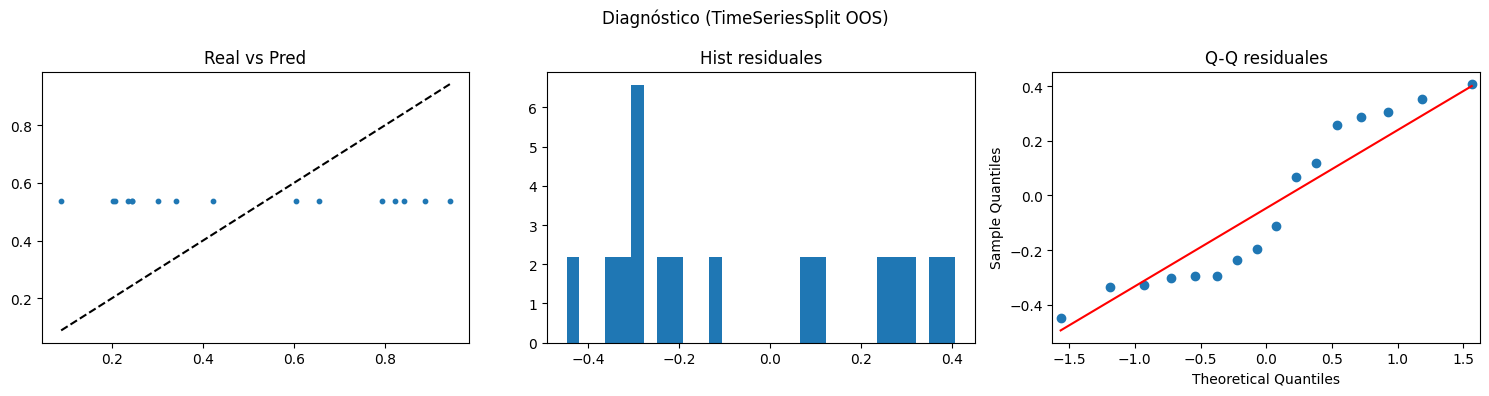

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Reusa tu pipe y tscv ya definidos
# pipe_pca_lasso = Pipeline([...])
# tscv = TimeSeriesSplit(n_splits=5)

# Toma la última partición temporal como “validación final”
splits = list(tscv.split(X))
train_idx, val_idx = splits[-1]

pipe_pca_lasso.fit(X[train_idx], y[train_idx])
y_val_pred = pipe_pca_lasso.predict(X[val_idx])

def diag_plot(y_true, y_pred, title="Diagnóstico"):
    resid = y_true - y_pred
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[0].scatter(y_true, y_pred, s=10)
    ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    ax[0].set_title("Real vs Pred")
    ax[1].hist(resid, bins=30, density=True)
    ax[1].set_title("Hist residuales")
    sm.qqplot(resid, line='s', ax=ax[2])
    ax[2].set_title("Q-Q residuales")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

diag_plot(y[val_idx], y_val_pred, title="Diagnóstico (TimeSeriesSplit OOS)")



## 1. Real vs Pred (izquierda)

**Qué muestra:** los valores reales (y_true) en el eje X contra las predicciones (y_pred) en el eje Y.

La línea negra es la bisectriz (y = x), donde caerían los puntos si el modelo predijera perfecto.

**Interpretación del gráfico:**

Tus predicciones están casi todas alrededor de un valor constante → parece que el modelo no está capturando la variabilidad real.

**En proyecto:** aquí señalas si el modelo “se ajusta bien” o si tiende a subestimar/sobreestimar.

## 2. Histograma de residuales (centro)

**Qué muestra:** distribución de los errores (resid = y_true - y_pred).

**Lo ideal:** que sea simétrica, centrada en 0, sin sesgos fuertes.

**Interpretación del gráfico:**

Los residuales no parecen centrados exactamente en 0 (se concentran entre -0.4 y -0.2).

Eso indica un sesgo sistemático: el modelo tiende a equivocarse hacia un lado.

## 3. Q-Q plot de residuales (derecha)

**Qué muestra:** compara la distribución de los residuales contra una normal teórica.

**Lo ideal:** los puntos deberían caer cerca de la línea roja → significa que los errores son aproximadamente normales.

**Interpretación del gráfico:**

**Hay curvatura clara: **los residuales no siguen bien una normal.

Esto sugiere que el supuesto de normalidad no se cumple (algo esperable si el modelo no está ajustando bien).

# 📌 ¿Qué es PCA + Lasso en pipeline?

### 1. PCA (Principal Component Analysis)
- **Qué hace**: reduce la dimensionalidad, condensando la información de muchas variables en unas pocas **componentes principales** que capturan la mayor parte de la varianza.  
- **Para qué sirve**:
  - Quita colinealidad entre variables.
  - Reduce ruido.
  - Acelera el entrenamiento.

### 2. Lasso (L1 Regularization)
- **Qué hace**: es una regresión penalizada que fuerza algunos coeficientes a **cero** → actúa como **selección automática de características**.  
- **Para qué sirve**:
  - Evita sobreajuste (overfitting).
  - Identifica qué variables son realmente importantes.
  - Hace que el modelo sea más interpretable.

### 3. El pipeline completo
```python
pipe_pca_lasso = Pipeline([
    ('scaler', StandardScaler()),       # estandariza (necesario para PCA y Lasso)
    ('pca', PCA(n_components=0.95)),    # conserva 95% de la varianza
    ('lasso', LassoCV(cv=tscv))         # selecciona alpha óptimo y elimina ruido
])


## Flujo:
Datos crudos → escalado → reducción de dimensionalidad (PCA) → selección y regularización (Lasso).

**Validación:** usar TimeSeriesSplit, que es lo correcto en series temporales (no mezclas futuro en entrenamiento).

✅ **¿Por qué es una “receta ganadora”?**

Porque combina extracción (PCA) y selección (Lasso).

Quita redundancia y ruido antes de entrenar.

Se adapta bien a datasets con muchas variables correlacionadas y series temporales.

El alpha* que devuelve Lasso y el n_components que devuelve PCA son interpretables: puedes decir cuántas dimensiones y qué nivel de regularización resultaron óptimos.

# 🍲 Recetas ganadoras para predicción / forecast en series temporales

## 1) Feature Engineering + Regularización
- **Receta:** crear **features rezagadas (lags)**, medias móviles, diferencias y variables de calendario (hora, día, mes, festivo, etc.).  
- **Modelo:** Ridge / Lasso / ElasticNet.  
- **Cuándo usarla:** cuando hay mucha correlación temporal pero también estacionalidad.  
- **Extra:** usar `TimeSeriesSplit` o `WalkForwardValidation`.

---

## 2) RFE + Árboles (RandomForest o Gradient Boosting)
- **Receta:** usar RFE (Recursive Feature Elimination) o feature importance de árboles para reducir features → entrenar con **XGBoost / LightGBM / CatBoost**.  
- **Cuándo usarla:** datasets grandes con muchas variables exógenas (clima, economía, sensores).  
- **Ganancia:** árboles capturan relaciones no lineales y manejan outliers sin problema.

---

## 3) PCA/Autoencoders + Red Neuronal
- **Receta:** compresión de alta dimensión (PCA lineal o Autoencoder no lineal) → luego LSTM, GRU o Transformer.  
- **Cuándo usarla:** cuando hay muchísimas variables correlacionadas (ej. datos energéticos, financieros, sensores IoT).  
- **Ganancia:** menos ruido y entrenamiento más estable.

---

## 4) Ensembling (Combinación de modelos)
- **Receta:** combinar modelos lineales + árboles + redes.  
  Ejemplo: promedio ponderado de ARIMA, XGBoost y LSTM.  
- **Cuándo usarla:** cuando un solo modelo no domina; útil en competiciones Kaggle.  
- **Ganancia:** reduce varianza, mejora robustez.

---

## 5) Modelos clásicos + ML híbrido
- **Receta:** ajustar un ARIMA / ETS para capturar tendencia y estacionalidad → usar ML (XGBoost, NN) sobre los **residuales**.  
- **Cuándo usarla:** cuando la serie tiene patrón clásico + señales no lineales en los residuales.  
- **Ganancia:** cada parte del modelo ataca un componente distinto.

---

## 6) Clustering + Forecast
- **Receta:** agrupar series similares (ej. k-means sobre perfiles normalizados) → entrenar un modelo por clúster.  
- **Cuándo usarla:** paneles de series (ej. múltiples clientes, estaciones meteorológicas).  
- **Ganancia:** modelos más específicos y precisos.

---

## 7) Deep Learning puro
- **Opciones:**  
  - **LSTM / GRU:** para dependencias largas.  
  - **Temporal Convolutional Networks (TCN):** capturan dependencias temporales con convoluciones.  
  - **Transformers (Attention):** muy potentes para multivariadas largas.  
- **Cuándo usarla:** gran cantidad de datos, relaciones no lineales y dependencias largas.  
- **Ganancia:** precisión SOTA en forecasting complejo.

---

## 8) Stacking con metamodelo
- **Receta:** entrenar varios modelos base (ARIMA, XGB, LSTM) → sus predicciones se usan como input de un **metamodelo** (ej. Ridge o NN pequeña).  
- **Cuándo usarla:** datasets ricos y tiempo de cómputo disponible.  
- **Ganancia:** saca lo mejor de cada modelo.


# 🔎 Estrategias para predicción y forecast — Comparativa

| Estrategia | Descripción | Ventajas | Desventajas | Cuándo usarla |
|------------|-------------|----------|-------------|---------------|
| **Feature Engineering + Regularización (Ridge/Lasso/ElasticNet)** | Crear lags, medias móviles, estacionalidad y ajustar un modelo lineal regularizado. | Simple, interpretable, evita sobreajuste, rápido. | Lineal, puede no capturar relaciones no lineales complejas. | Series pequeñas/medianas con patrones claros y variables exógenas. |
| **RFE + Árboles (RandomForest, XGBoost, LightGBM, CatBoost)** | Selección de variables (RFE o feature importance) y luego boosting/bagging. | Maneja no linealidad, robusto a outliers, funciona con muchas features. | Más costoso en cómputo, tuning necesario. | Datos multivariados grandes (clima, energía, economía). |
| **PCA/Autoencoder + LSTM/GRU** | Reducir dimensionalidad con PCA/Autoencoder y alimentar a una red recurrente. | Quita ruido y colinealidad, capta dependencias largas. | Menos interpretable, requiere muchos datos. | Forecast con muchas variables correlacionadas (IoT, sensores). |
| **Ensembling (promedio/ponderado)** | Combinar varios modelos y promediar sus predicciones. | Reduce varianza, mejora robustez, simple de implementar. | No siempre mejora si los modelos son muy parecidos. | Competencias, entornos donde la estabilidad es clave. |
| **Híbrido ARIMA + ML en residuales** | ARIMA para tendencia/estacionalidad, ML para residuales. | Aprovecha fortalezas de ambos mundos, interpretable. | Más pasos, tuning doble, posible sobreajuste. | Series con estructura clásica + señales no lineales. |
| **Clustering + Forecast** | Agrupar series similares (ej. k-means) y entrenar por clúster. | Modelos más específicos y precisos, reduce varianza. | Requiere definir número de clústeres, puede fragmentar demasiado. | Paneles de series (ej. clientes, estaciones meteorológicas). |
| **Deep Learning (LSTM, GRU, TCN, Transformers)** | Redes recurrentes, convolucionales o basadas en atención. | Capturan dependencias largas y no lineales, estado del arte. | Alto costo de entrenamiento, poca interpretabilidad. | Datasets grandes y complejos, forecasting multivariado. |
| **Stacking con metamodelo** | Entrenar varios modelos base y combinar con un metamodelo (ej. Ridge). | Saca lo mejor de cada modelo, flexible. | Complejo de implementar, costoso. | Forecast con múltiples fuentes de datos y tiempo de cómputo suficiente. |


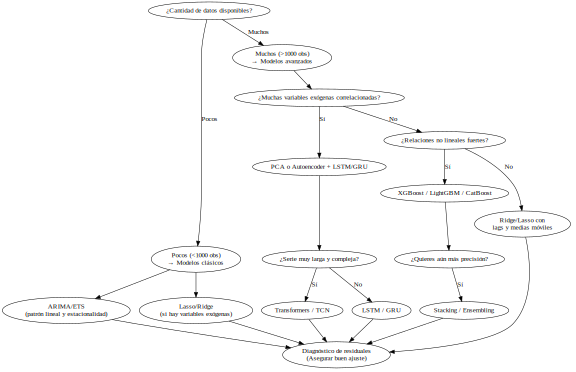

In [14]:
# Instalar graphviz (si no está)
!apt-get -qq install graphviz
!pip install graphviz

from graphviz import Digraph

dot = Digraph(comment="Receta de Estrategia Forecast")
dot.attr(rankdir='TB', size='8')

# Nodos principales
dot.node('A', '¿Cantidad de datos disponibles?')
dot.node('B', 'Pocos (<1000 obs)\n→ Modelos clásicos')
dot.node('C', 'Muchos (>1000 obs)\n→ Modelos avanzados')

dot.edge('A', 'B', label='Pocos')
dot.edge('A', 'C', label='Muchos')

# Rama Modelos clásicos
dot.node('B1', 'ARIMA/ETS\n(patrón lineal y estacionalidad)')
dot.node('B2', 'Lasso/Ridge\n(si hay variables exógenas)')
dot.edge('B', 'B1')
dot.edge('B', 'B2')

# Rama Modelos avanzados
dot.node('D', '¿Muchas variables exógenas correlacionadas?')
dot.edge('C', 'D')

dot.node('E', 'PCA o Autoencoder + LSTM/GRU')
dot.node('F', '¿Relaciones no lineales fuertes?')
dot.edge('D', 'E', label='Sí')
dot.edge('D', 'F', label='No')

dot.node('G', 'XGBoost / LightGBM / CatBoost')
dot.node('H', 'Ridge/Lasso con\nlags y medias móviles')
dot.edge('F', 'G', label='Sí')
dot.edge('F', 'H', label='No')

dot.node('I', '¿Quieres aún más precisión?')
dot.edge('G', 'I')

dot.node('J', 'Stacking / Ensembling')
dot.edge('I', 'J', label='Sí')

# Rama Deep Learning largo
dot.node('K', '¿Serie muy larga y compleja?')
dot.edge('E', 'K')

dot.node('L', 'Transformers / TCN')
dot.node('M', 'LSTM / GRU')
dot.edge('K', 'L', label='Sí')
dot.edge('K', 'M', label='No')

# Nodo final común
dot.node('Z', 'Diagnóstico de residuales\n(Asegurar buen ajuste)')
for n in ['B1','B2','H','M','L','J']:
    dot.edge(n, 'Z')

# Mostrar en colab
dot.render('forecast_recipe.gv', view=True)
dot
